In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
city_data = "city_data.csv"
ride_data = "ride_data.csv"

In [3]:
ride_data_df = pd.read_csv(ride_data)
city_data_df = pd.read_csv(city_data)

In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
pyber_df = pd.merge(ride_data_df, city_data_df, how='inner', on='city')
pyber_df.head(3)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban


In [7]:
pyber_info = pyber_df.groupby(["city", "type", "driver_count"]).agg({'fare': ['count', 'mean']}).rename(columns={'count': 'Total_Rides', 'mean': 'Average_Fare'})
pyber_info.columns = pyber_info.columns.droplevel(0)

In [8]:
pyber_info = pyber_info.reset_index()

In [9]:
pyber_info.head(5) 

,city,type,driver_count,Total_Rides,Average_Fare
0,Alvarezhaven,Urban,21,31,23.928710
1,Alyssaberg,Urban,67,26,20.609615
2,Anitamouth,Suburban,16,9,37.315556
3,Antoniomouth,Urban,21,22,23.625000
4,Aprilchester,Urban,49,19,21.981579


In [10]:
#determine # of rows
pyber_info.shape

(126, 5)

In [11]:
% matplotlib inline 

In [12]:
#determine number of unique cities to avoid duplicates
pyber_info['city'].nunique() 

125

In [13]:
#drop the duplicate city to clean the data
pyber_info = pyber_info.drop(pyber_info.index[72])

In [14]:
#call rows where duplicate city was to make sure it was removed 
pyber_info.iloc[65:75,:]

,city,type,driver_count,Total_Rides,Average_Fare
65,North Tracyfort,Suburban,18,10,26.856000
66,North Whitney,Rural,10,10,38.146000
67,Pamelahaven,Urban,30,15,25.549333
68,Paulfort,Suburban,13,13,31.144615
69,Pearsonberg,Urban,43,20,23.307500
70,Port Alexandria,Suburban,27,15,26.316667
71,Port Guytown,Suburban,26,15,28.242000
73,Port James,Suburban,15,32,31.806562
74,Port Johnstad,Urban,22,34,25.882941
75,Port Jose,Suburban,11,18,31.193889


In [15]:
#add colors to each city type for plots
city_type = np.unique(pyber_info['type'])
colors = ['gold', 'lightskyblue', 'lightcoral']
for i in range(len(city_type)):
    print(city_type[i]+colors[i])
explode = (0, 0, 0.05)

Ruralgold
Suburbanlightskyblue
Urbanlightcoral


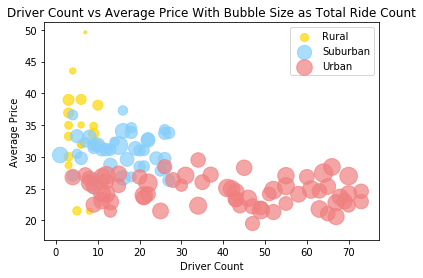

In [16]:
#bubble plot displaying the average price of a pyber ride(x-axis) vs the driver count for each city(y-axis).
#the bubble size represents the total number of rides in each city and the color represents city type. 
for i in range(len(city_type)):
    plt.scatter(pyber_info[pyber_info['type']== city_type[i]]['driver_count'].values, 
                pyber_info[pyber_info['type']== city_type[i]]['Average_Fare'].values, 
                s = 10 * pyber_info[pyber_info['type']== city_type[i]]['Total_Rides'].values,
                c= colors[i], alpha=0.7, label= city_type[i])
plt.title('Driver Count vs Average Price With Bubble Size as Total Ride Count')
plt.xlabel('Driver Count')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [17]:
#add additional column for 'Total_Fare'
pyber_info['Total_Fare'] = pyber_info['Total_Rides'] * pyber_info['Average_Fare'] 
pyber_info.head(3)

,city,type,driver_count,Total_Rides,Average_Fare,Total_Fare
0,Alvarezhaven,Urban,21,31,23.928710,741.79
1,Alyssaberg,Urban,67,26,20.609615,535.85
2,Anitamouth,Suburban,16,9,37.315556,335.84


In [18]:
sum_table = pyber_info.groupby(['type']).agg({'Total_Fare': 'sum', 'driver_count': 'sum', 'Total_Rides': 'sum'})
sum_table.apply(lambda x: round (100* x/x.sum(),2)) 

,Total_Fare,driver_count,Total_Rides
type,,,
Rural,6.68,3.11,5.26
Suburban,30.35,18.98,26.32
Urban,62.97,77.91,68.42


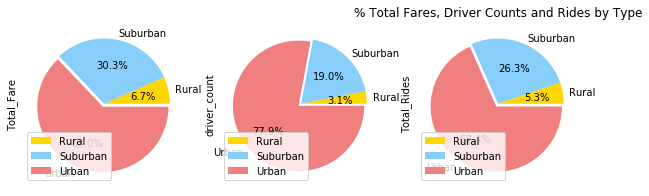

In [34]:
sum_table.plot.pie(subplots=True, colors=colors, explode=explode, autopct='%1.1f%%', figsize=(10,3)) 
plt.title("% Total Fares, Driver Counts and Rides by Type")
plt.show()